In [1]:
import pandas as pd
from graph_drawer import get_nx_representation
from graph_stats import compute_graph_statistics, draw_degree_dist
from dataset import PacketsDatapipe, get_labels

In [2]:
packet_list_dataset_location = r'App\src\build_release\own\packet_list_dataset'
size_delay_dataset_location = r'App\src\build_release\own\size_delay_dataset'
dataset = PacketsDatapipe(size_delay_dataset_location, batch_size=1, balanced=True)[0]

0 (nonvpn-netflix): 15238
1 (nonvpn-rdp): 4594
2 (nonvpn-rsync): 24666
3 (nonvpn-scp): 9311
4 (nonvpn-sftp): 90904
5 (nonvpn-skype-chat): 5465
7 (nonvpn-vimeo): 11597
9 (nonvpn-youtube): 5447
10 (vpn-netflix): 4201
11 (vpn-rdp): 6420
14 (vpn-sftp): 29592
15 (vpn-skype-chat): 6936
17 (vpn-vimeo): 6299
19 (vpn-youtube): 3949
Balanced to: 3949


In [3]:
graph_statistics_list = []

# Compute statistics for each graph
for index, graph in enumerate(dataset):
    label = graph.y.item()
    try:
        graph_stats = compute_graph_statistics(get_nx_representation(graph.x, graph.edge_index))
        graph_stats['graph_id'] = index
        graph_stats['label'] = label
        graph_stats['label_name'] = get_labels()[label]

    except:
        graph_stats = compute_graph_statistics(get_nx_representation(graph.x, graph.edge_index))
    else:
        graph_statistics_list.append(graph_stats)
    
    print(f'Processing: {index+1}', end='\r')

# Create a DataFrame from the list of statistics
df_stats = pd.DataFrame(graph_statistics_list)

In [56]:
# get rows for every graph label
stats_display = df_stats.groupby('label', group_keys=False).apply(lambda group : group.head(3))

In [58]:
stats_display.columns

Index(['NumNodes', 'NumEdges', 'Density', 'AverageDegree',
       'DegreeDistribution', 'AverageClusteringCoefficient',
       'AverageShortestPathLength', 'DegreeCentrality', 'ClosenessCentrality',
       'BetweennessCentrality', 'Eccentricity', 'Diameter', 'Radius',
       'graph_id', 'label', 'label_name'],
      dtype='object')

In [61]:
print(stats_display.drop(columns=['label_name', 'DegreeDistribution', 'graph_id', 'DegreeCentrality', 'ClosenessCentrality', 'BetweennessCentrality', 'Eccentricity']).to_latex(index=False, float_format='%.2f'))

\begin{tabular}{rrrrrrrrr}
\toprule
NumNodes & NumEdges & Density & AverageDegree & AverageClusteringCoefficient & AverageShortestPathLength & Diameter & Radius & label \\
\midrule
4 & 10 & 0.83 & 5.00 & 0.85 & 1.17 & 2.00 & 1.00 & 0 \\
5 & 19 & 0.95 & 7.60 & 0.95 & 1.05 & 2.00 & 1.00 & 0 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 0 \\
3 & 6 & 1.00 & 4.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1 \\
3 & 6 & 1.00 & 4.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1 \\
9 & 60 & 0.83 & 13.33 & 0.87 & 1.17 & 2.00 & 1.00 & 1 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 2 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 2 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 2 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 3 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 3 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 3 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 4 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.00 & 4 \\
2 & 2 & 1.00 & 2.00 & 0.00 & 1.00 & 1.00 & 1.

In [84]:
graph_describes_stats = df_stats.drop(columns=['label_name', 'DegreeDistribution', 'graph_id', 'DegreeCentrality', 'ClosenessCentrality', 'BetweennessCentrality', 'Eccentricity']).groupby('label').describe().drop('count', level=1, axis=1).transpose()

In [85]:
graph_describes_stats

label                                     0           1          2   \
NumNodes                     mean   3.152444    6.219296   2.002532   
                             std    1.638894    3.023971   0.228412   
                             min    0.000000    2.000000   0.000000   
                             25%    2.000000    3.000000   2.000000   
                             50%    2.000000    6.000000   2.000000   
                             75%    4.000000    9.000000   2.000000   
                             max   12.000000   15.000000   7.000000   
NumEdges                     mean   7.966067   33.469992   2.049886   
                             std    9.583995   29.969791   1.281460   
                             min    0.000000    2.000000   0.000000   
                             25%    2.000000    6.000000   2.000000   
                             50%    2.000000   24.000000   2.000000   
                             75%   11.000000   53.000000   2.000000   
                             max   88.000000  157.000000  36.000000   
Density                      mean   0.931634    0.877788   0.996370   
                             std    0.117661    0.110638   0.057748   
                             min    0.000000    0.500000   0.000000   
                             25%    0.850000    0.785714   1.000000   
                             50%    1.000000    0.875000   1.000000   
                             75%    1.000000    1.000000   1.000000   
                             max    1.000000    1.000000   1.000000   
AverageDegree                mean   3.805797    8.654567   2.015093   
                             std    2.460906    4.410933   0.328100   
                             min    2.000000    2.000000   2.000000   
                             25%    2.000000    4.000000   2.000000   
                             50%    2.000000    8.000000   2.000000   
                             75%    5.500000   12.222222   2.000000   
                             max   16.000000   22.428571  10.285714   
AverageClusteringCoefficient mean   0.383430    0.865261   0.002259   
                             std    0.437922    0.187467   0.044846   
                             min    0.000000    0.000000   0.000000   
                             25%    0.000000    0.815952   0.000000   
                             50%    0.000000    0.887707   0.000000   
                             75%    0.848880    1.000000   0.000000   
                             max    1.000000    1.000000   1.000000   
AverageShortestPathLength    mean   1.054835    1.101347   1.000339   
                             std    0.087562    0.101812   0.007432   
                             min    1.000000    1.000000   1.000000   
                             25%    1.000000    1.000000   1.000000   
                             50%    1.000000    1.083333   1.000000   
                             75%    1.100000    1.190476   1.000000   
                             max    1.400000    1.375000   1.250000   
Diameter                     mean   1.331214    1.593695   1.002287   
                             std    0.491643    0.512735   0.047770   
                             min    1.000000    1.000000   1.000000   
                             25%    1.000000    1.000000   1.000000   
                             50%    1.000000    2.000000   1.000000   
                             75%    2.000000    2.000000   1.000000   
                             max    3.000000    3.000000   2.000000   
Radius                       mean   1.000000    1.000000   1.000000   
                             std    0.000000    0.000000   0.000000   
                             min    1.000000    1.000000   1.000000   
                             25%    1.000000    1.000000   1.000000   
                             50%    1.000000    1.000000   1.000000   
                             75%    1.000000    1.000000   1.000000   
                        

In [92]:
print(graph_describes_stats.to_latex(column_format=f"1" * len(graph_describes_stats.columns), float_format='%.1f'))

\begin{tabular}{11111111111111}
\toprule
 & label & 0 & 1 & 2 & 3 & 4 & 5 & 7 & 9 & 10 & 11 & 14 & 15 & 17 & 19 \\
\midrule
\multirow[t]{7}{*}{NumNodes} & mean & 3.2 & 6.2 & 2.0 & 2.0 & 2.1 & 5.9 & 4.9 & 5.2 & 4.5 & 5.3 & 2.4 & 6.0 & 5.3 & 5.0 \\
 & std & 1.6 & 3.0 & 0.2 & 0.3 & 0.3 & 1.0 & 1.7 & 1.4 & 2.0 & 2.5 & 0.9 & 1.2 & 2.2 & 1.7 \\
 & min & 0.0 & 2.0 & 0.0 & 2.0 & 0.0 & 3.0 & 0.0 & 2.0 & 0.0 & 2.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 & 25% & 2.0 & 3.0 & 2.0 & 2.0 & 2.0 & 5.0 & 4.0 & 4.0 & 3.0 & 3.0 & 2.0 & 5.0 & 4.0 & 4.0 \\
 & 50% & 2.0 & 6.0 & 2.0 & 2.0 & 2.0 & 6.0 & 5.0 & 5.0 & 5.0 & 5.0 & 2.0 & 6.0 & 5.0 & 5.0 \\
 & 75% & 4.0 & 9.0 & 2.0 & 2.0 & 2.0 & 7.0 & 6.0 & 6.0 & 6.0 & 7.0 & 3.0 & 7.0 & 7.0 & 6.0 \\
 & max & 12.0 & 15.0 & 7.0 & 7.0 & 5.0 & 10.0 & 11.0 & 11.0 & 11.0 & 15.0 & 9.0 & 11.0 & 13.0 & 11.0 \\
\cline{1-16}
\multirow[t]{7}{*}{NumEdges} & mean & 8.0 & 33.5 & 2.0 & 2.1 & 2.2 & 26.9 & 18.4 & 19.8 & 14.9 & 23.4 & 3.6 & 27.9 & 21.4 & 17.0 \\
 & std & 9.6 & 30.0 & 1.3 & 1.6 & 

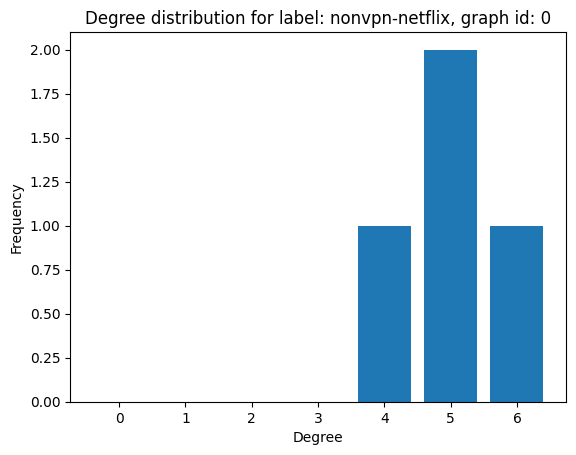

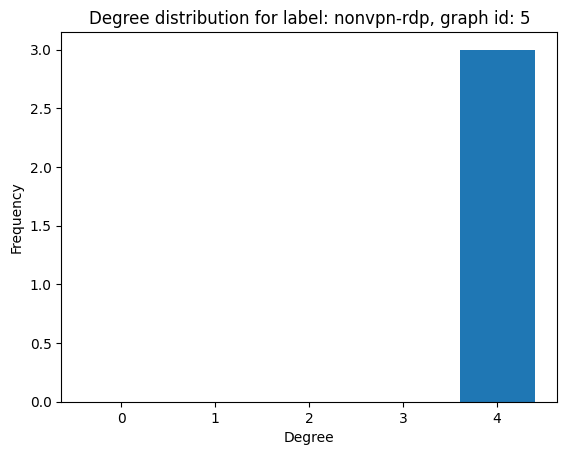

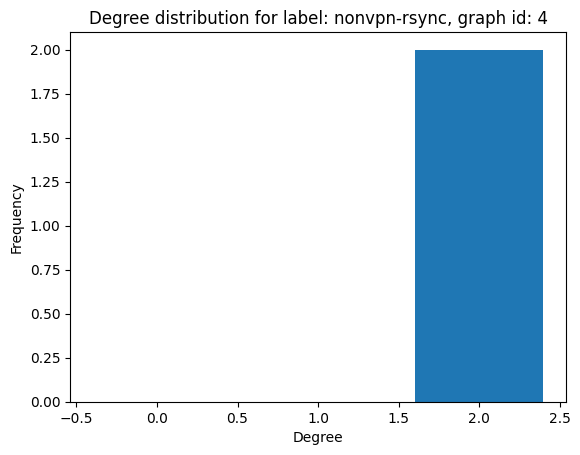

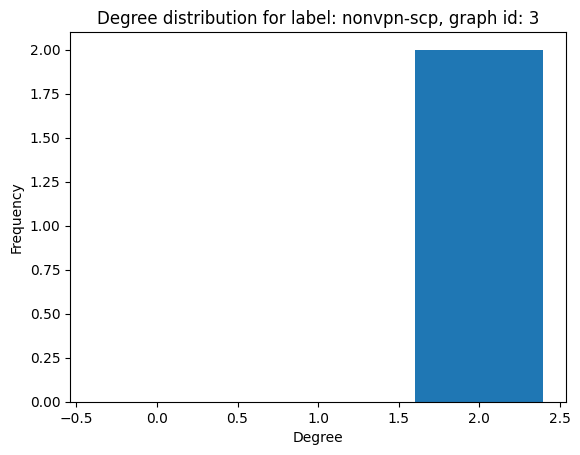

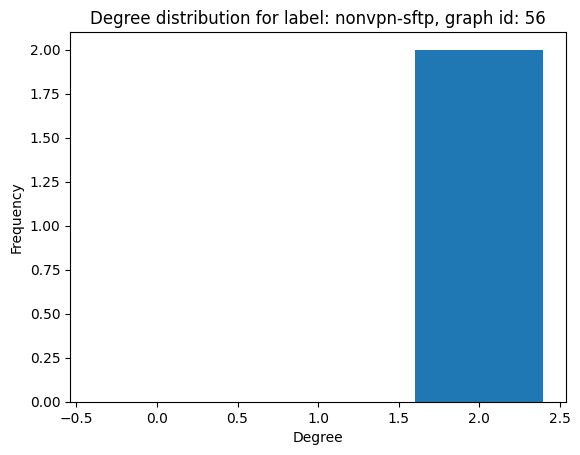

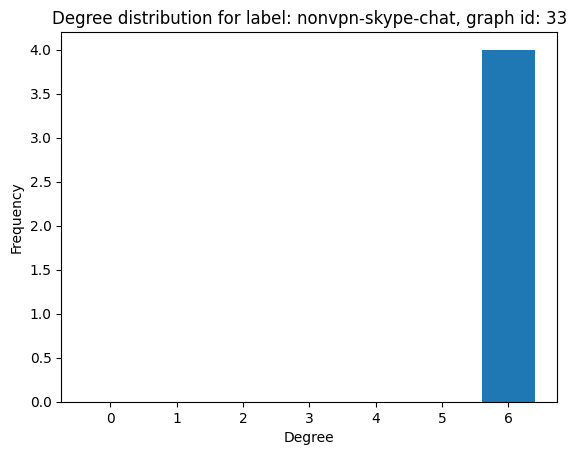

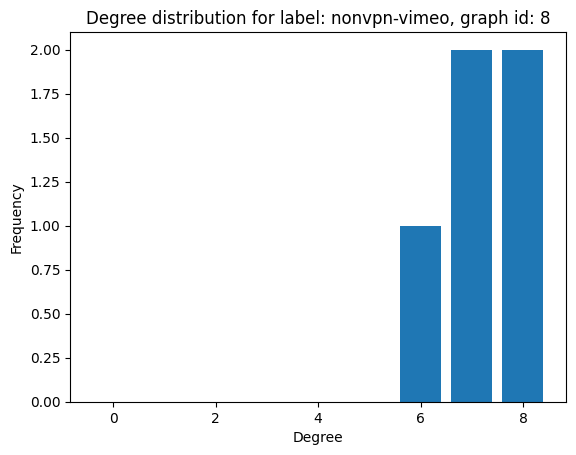

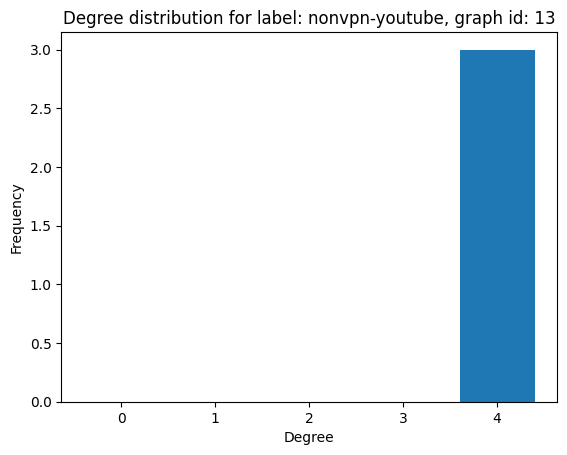

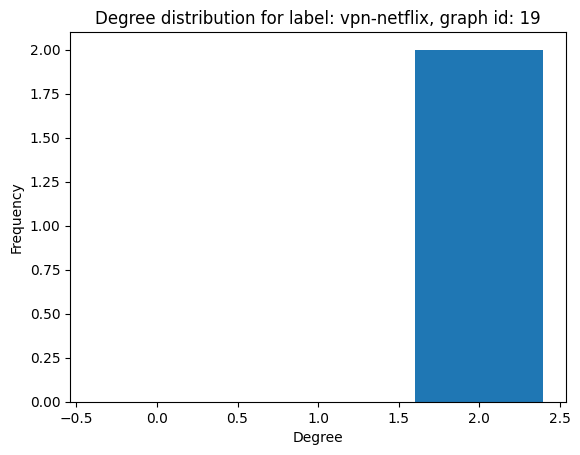

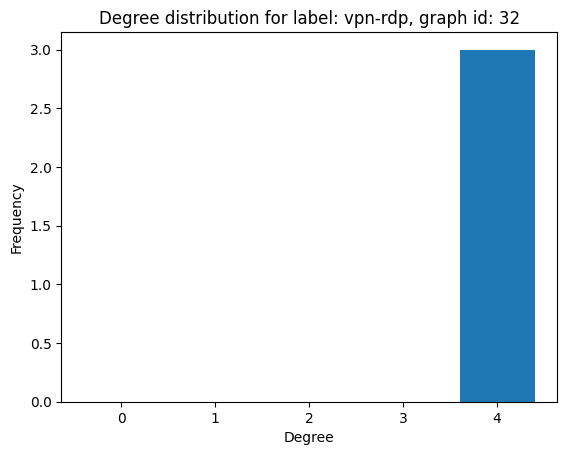

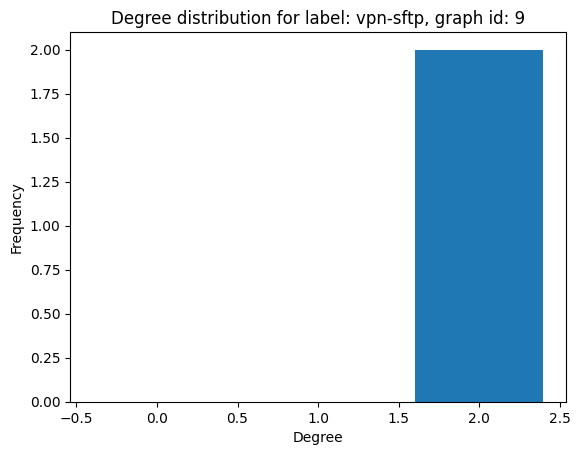

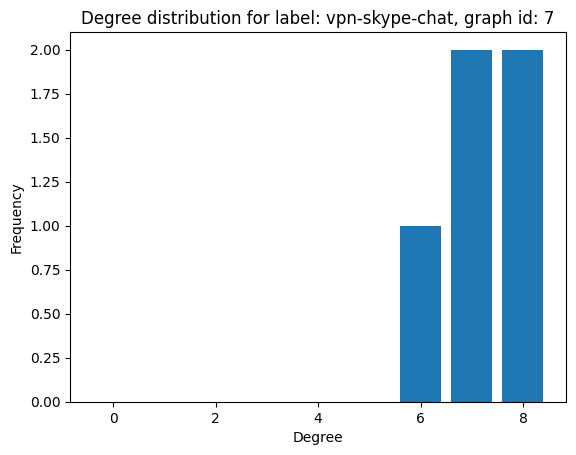

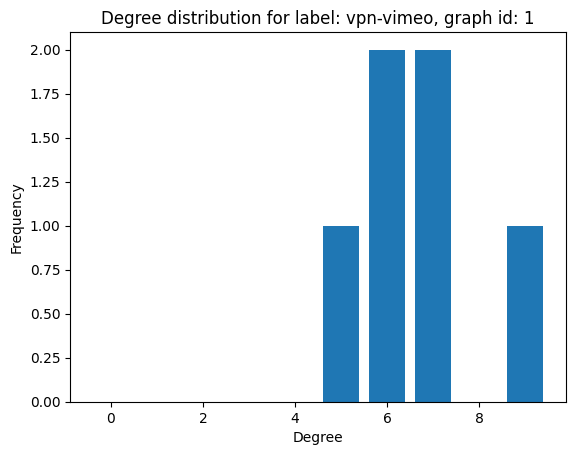

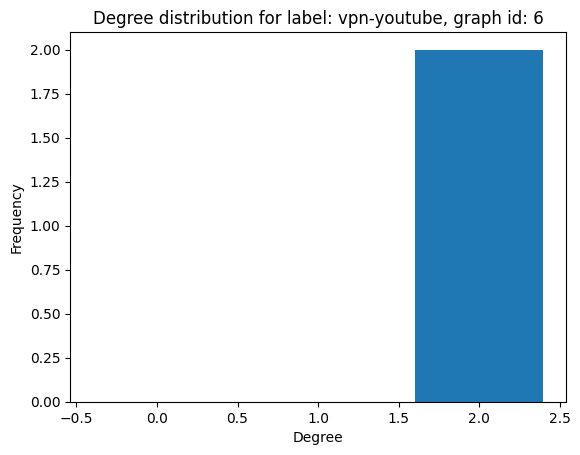

0     None
5     None
4     None
3     None
56    None
33    None
8     None
13    None
19    None
32    None
9     None
7     None
1     None
6     None
dtype: object

In [10]:

# draw degree distributons
df_stats.groupby('label', group_keys=False) \
.apply(lambda group : group.head(1)) \
.apply(lambda row : draw_degree_dist(row['DegreeDistribution'], f'Degree distribution for label: {get_labels()[row["label"]]}, graph id: {row["graph_id"]}'), axis=1)